<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**


---

# Fetal Health prediction

Maternity is an important part of life, especially in humans (and mammals in general) where newborns require a higher degree of parental care. Thus, assessing Fetal Health must be an important part of any healthcare program.

<p align=center>
<img src="img/fetal_health.jpg" width="40%"><br>
<i><sup>Image credits: freepik (<a href="https://br.freepik.com/vetores-gratis/gravidez-e-cenas-de-maternidade_9882829.htm">www.freepik.com</a>)</sup></i>
</p>

Usually, a regular pregnancy lasts around 37 to 42 weeks<sup>1</sup>. This period is usually divided into three months periods (trimesters), and the fetus grows and develops in each and every phase. Asssesing the fetus' health during these periods are very important and can help keep the parent and the baby healthy, spot issues if there are any and prevent problems during delivery, among other benefits<sup>2</sup>. Thus, being able to predict if a baby is healthy or not while still in the womb becomes an important issue that can be addressed by machine learning.

In this notebook we will be looking at a Fetal Health dataset, using classification machine learning models in [PyCaret](https://pycaret.org/). PyCaret is a popular, low-code library, that provides an automated way to create data analysis workflows using Machine Learning. It aims to reduce time used for coding the models, while leaving more time for the analyses themselves.

## The Data

The data for this project was obtained on [Kaggle](https://www.kaggle.com/annetxu/health-insurance-cost-prediction). According to the dataset's page, the data comprises 2126 observations over 21 features. These features come from Cardiotocogram exames. Cardiotography, usually called CTG, is a method to continuously monitor fetal heart rates, as well as womb contractions, using ultrasound and is a widely used method to assess fetal wellbeing<sup>3</sup>.

According to the dataset page, the patients were classified by three expert obstetritians into one of three classes: normal, suspect or pathological; indicating the current health scenario.

For ease of access I have downloaded the dataset and included it in the `data` folder for this project. Now let us begin.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import tools

# Importing pycaret tools
from pycaret.classification import setup, compare_models, models, create_model, predict_model
from pycaret.classification import tune_model, plot_model, interpret_model, evaluate_model, finalize_model
from pycaret.classification import save_model, load_model

# Getting the data
df = pd.read_csv("data/fetal_health.csv")

# Life, the Universe, and Everything
np.random.seed(42)

# Defining plot parameters
# plt.style.use('dark_background')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.stretch'] = 'normal'
plt.rcParams['font.style'] = 'normal'
plt.rcParams['font.variant'] = 'normal'

# Checking first entries of the dataset
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [2]:
df.shape

(2126, 22)

### Our variables

According to the dataset webpage on Kaggle, our variables represent the following:

* `baseline value` = Baseline Fetal Heart Rate (FHR).
* `accelerations` = Number of accelerations per second.
* `fetal_movement` = Number of fetal movements per second.
* `uterine_contractions` = Number of uterine contractions per second.
* `light_decelerations` = Number of LDs per second.
* `severe_decelerations` = Number of SDs per second.
* `prolongued_decelerations` = Number of PDs per second.
* `abnormal_short_term_variability` = Percentage of time with abnormal short term variability.
* `mean_value_of_short_term_variability` = Mean value of short term variability.
* `percentage_of_time_with_abnormal_long_term_variability` = Percentage of time with abnormal long term variability.
* `mean_value_of_long_term_variability` = Mean value of long term variability.
* `histogram_width` = Width of the histogram made using all values from a record.
* `histogram_min` = Histogram minimum value.
* `histogram_max` = Histogram maximum value.
* `histogram_number_of_peaks` = Number of peaks in the exam histogram.
* `histogram_number_of_zeroes` = Number of zeroes in the exam histogram.
* `histogram_mode` = Mode of the exam histogram.
* `histogram_mean` = Mean of the exam histogram.
* `histogram_median` = Median of the exam histogram.
* `histogram_variance` = Variance of the exam histogram.
* `histogram_tendency` = Trend of the exam histogram.
* `fetal_health` = Our actual variable of interest, corresponding: 1 - Normal 2 - Suspect 3 - Pathological.

Now let's check how our variables are encoded:

In [3]:
# Checking our variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


Okay, Houston, we've had a problem here! Our target variable is `fetal_health`, but that variable type is `float64` and our minimum value is `1`. Let us see what is going on here:

In [5]:
# Checking target variable
print(df.fetal_health.unique())

[2. 1. 3.]


In [6]:
# Check first values
df.fetal_health.head()

0    2.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: fetal_health, dtype: float64

The variable is coded starting in `1`. However, since Python indexes start at zero, this might lead to problems further down the line so let us fix that.

In [7]:
# Fixing target variable
df['fetal_health'] = np.select([(df['fetal_health'] == 1),
                                (df['fetal_health'] == 2),
                                (df['fetal_health'] == 3)], 
                                [0,1,2])

# Checking again
df.fetal_health.head()

0    1
1    0
2    0
3    0
4    0
Name: fetal_health, dtype: int32

As we saw above, none of our features have any missing values. Since they are all `float64`, we can be sure that there are no empty strings counting as non-empty values. However, there could be a case of a variable that can't be zero. The fetal baseline heart rate, for example, can't be zero for obvious reasons. We also saw from our descriptive statistics above that there are no zero values in this column of our dataset, which is good. Let's generate a report with SweetViz so we can have a better view of our dataset:

In [8]:
# Making sweetviz report
sweetviz = sv.analyze(df)
sweetviz.show_html('class.html')

                                             |          | [  0%]   00:00 -> (? left)

Report class.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


(Click [here](https://htmlpreview.github.io/?https://github.com/cfantecelle/data_science_portfolio/blob/63680c0f93d8a1fadaca7be2c21e7b8b283ee368/project_automl/class.html) to see the HTML report from GitHub.)

From this report we can see that our features have different distributions, and most of them are skewed. In addition, when evaluating the correlations between the features we can see that some of them are inversely correlated to one another and some of them are not correlated to our target variable at all. Thus, in this project we will use *Feature Selection* to verify if we can improve the classification of our dataset.

*Feature Selection*, or variable/attribute selection, in machine learning and statistics is an approach that takes advantage of selecting a subset of relevant features (variables or predictors) to use for construction of models<sup><a href="https://en.wikipedia.org/wiki/Feature_selection">4</a></sup>. Working with this subset of features brings advantages to our models by reducing its size (and, consequently, training times), reduzing the risk of over-fitting, improving accuracy of the model<sup><a href="https://pycaret.gitbook.io/docs/get-started/preprocessing/feature-selection">5</a></sup>. PyCaret has a parameter for model construction called `feature_selection` which, when set to `True`, will employ several supervised techniques for feature selection in the model using a threshold<sup><a href="https://pycaret.gitbook.io/docs/get-started/preprocessing/feature-selection">5</a></sup>.

Let's check our target variable:

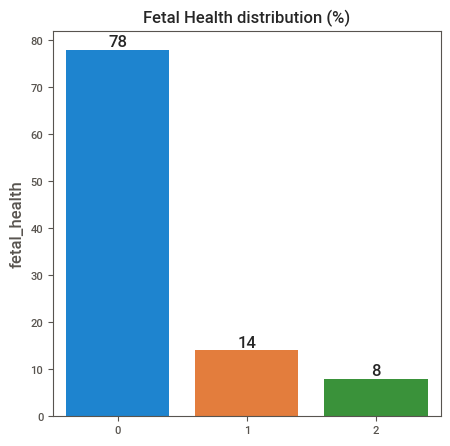

In [9]:
# Plotting barplot
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x=sorted(df.fetal_health.unique()), y=round(df.fetal_health.value_counts()/df.shape[0]*100), data=df, ax=ax)
ax.set_title('Fetal Health distribution (%)', fontsize=12, weight='bold')
ax.bar_label(ax.containers[0]);

Our target variable, `fetal_health`, is very unbalanced towards the healthy status. And here our goal is to try and predict when the fetus might not be healthy. Thus, when building our models we will deal with that as well. Now we can split our data into train and test datasets before proceeding with PyCaret.

In [10]:
# Creating test dataset
test = df.sample(frac=0.25, random_state=42)

# Creating train data by dropping test data
train = df.drop(test.index)

# Resetting indexes
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

Let's check if our proportions match the original dataset:

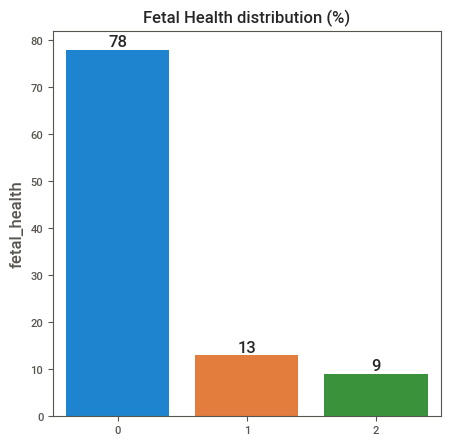

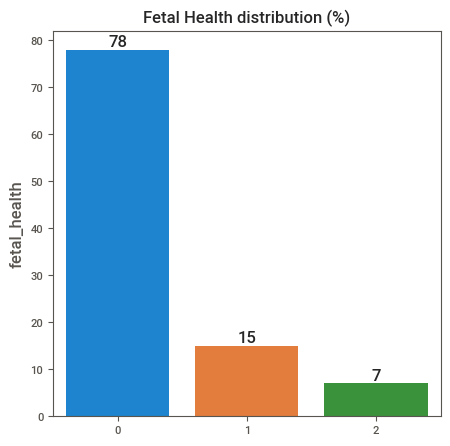

In [11]:
# Plotting barplot
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x=sorted(train.fetal_health.unique()), y=round(train.fetal_health.value_counts()/train.shape[0]*100), data=train, ax=ax)
ax.set_title('Fetal Health distribution (%)', fontsize=12, weight='bold')
ax.bar_label(ax.containers[0]);

# Plotting barplot
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x=sorted(test.fetal_health.unique()), y=round(test.fetal_health.value_counts()/test.shape[0]*100), data=test, ax=ax)
ax.set_title('Fetal Health distribution (%)', fontsize=12, weight='bold')
ax.bar_label(ax.containers[0]);

They have roughly the same percentages, so we will proceed with the analysis.

## Classification with PyCaret

To begin our classification analysis with PyCaret, we first instantiate the setup with our parameters. Here, we will make two classification setups: one where we will use the `feature_selection` option from the PyCaret pipeline and one where we will not. Thus, we will be able to see how this approach can improve our models.

### Setting up models

#### Without Feature Selection

In [12]:
# Setting up classification models without feature selection
class_feat = setup(data=train,
             target='fetal_health',
             normalize=True,
             normalize_method='zscore',
             experiment_name='FetalHealthClass',
             session_id=42,
             feature_selection=False,
             fix_imbalance=True
             )


,Description,Value
0,session_id,42
1,Target,fetal_health
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(1594, 22)"
5,Missing Values,False
6,Numeric Features,20
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


So, now that we've setup our analysis, let's see how the models perform in these settings:

In [13]:
best_nofeat = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9417,0.9855,0.8930,0.9438,0.9416,0.8372,0.8389,0.1900
lightgbm,Light Gradient Boosting Machine,0.9417,0.9851,0.8867,0.9448,0.9416,0.8373,0.8399,0.2370
catboost,CatBoost Classifier,0.9381,0.9831,0.8896,0.9406,0.9380,0.8286,0.8305,5.8850
rf,Random Forest Classifier,0.9345,0.9828,0.8851,0.9375,0.9346,0.8195,0.8217,0.0840
et,Extra Trees Classifier,0.9319,0.9834,0.8611,0.9333,0.9306,0.8059,0.8090,0.0800
gbc,Gradient Boosting Classifier,0.9309,0.9757,0.8879,0.9350,0.9317,0.8104,0.8124,0.3310
dt,Decision Tree Classifier,0.8987,0.8760,0.8369,0.9073,0.9009,0.7257,0.7288,0.0100
ada,Ada Boost Classifier,0.8888,0.8960,0.8083,0.8971,0.8906,0.6958,0.7003,0.0440
lr,Logistic Regression,0.8718,0.9662,0.8356,0.9026,0.8814,0.6862,0.6988,1.0140
knn,K Neighbors Classifier,0.8655,0.9445,0.8425,0.8986,0.8759,0.6719,0.6853,0.3310


#### With Feature Selection

In [14]:
# Setting up classification models with feature selection
class_nofeat = setup(data=train,
                     target='fetal_health',
                     normalize=True,
                     normalize_method='zscore',
                     experiment_name='FetalHealthClass',
                     session_id=42,
                     feature_selection=True,
                     fix_imbalance=True
                    )

,Description,Value
0,session_id,42
1,Target,fetal_health
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(1594, 22)"
5,Missing Values,False
6,Numeric Features,20
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


And comparing our models now, we have:

In [16]:
best_feat = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9462,0.9849,0.9037,0.9491,0.9462,0.8506,0.8528,0.1550
et,Extra Trees Classifier,0.9399,0.9857,0.8869,0.9412,0.9395,0.8323,0.8335,0.0910
xgboost,Extreme Gradient Boosting,0.9381,0.9846,0.8865,0.9398,0.9376,0.8267,0.8286,0.1980
rf,Random Forest Classifier,0.9345,0.9833,0.8819,0.9371,0.9349,0.8197,0.8208,0.1060
gbc,Gradient Boosting Classifier,0.9345,0.9784,0.8970,0.9394,0.9356,0.8221,0.8245,0.3730
catboost,CatBoost Classifier,0.9336,0.9825,0.8858,0.9380,0.9344,0.8185,0.8208,6.6750
dt,Decision Tree Classifier,0.9032,0.8803,0.8244,0.9053,0.9037,0.7340,0.7349,0.0110
ada,Ada Boost Classifier,0.8906,0.8938,0.8019,0.8960,0.8910,0.6941,0.6973,0.0570
svm,SVM - Linear Kernel,0.8781,0.0000,0.8502,0.9076,0.8862,0.7009,0.7137,0.0150
lr,Logistic Regression,0.8745,0.9678,0.8514,0.9069,0.8842,0.6955,0.7096,0.0400


## References

1: https://www.nhs.uk/pregnancy/finding-out/due-date-calculator/

2: https://medlineplus.gov/fetalhealthanddevelopment.html

3: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6510058/

4: https://en.wikipedia.org/wiki/Feature_selection

5: https://pycaret.gitbook.io/docs/get-started/preprocessing/feature-selection
